### Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [3]:
birth_Death_Rate_Data = pd.read_csv('crude-birth-death-natural-increase-rates-by-ethnic-group-from-1971-onwards.csv')
graduate_Salary_Data = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding = 'latin-1')


### Singapore Birth Rate over the years


<AxesSubplot: xlabel='year', ylabel='Average Crude Birth Rate'>

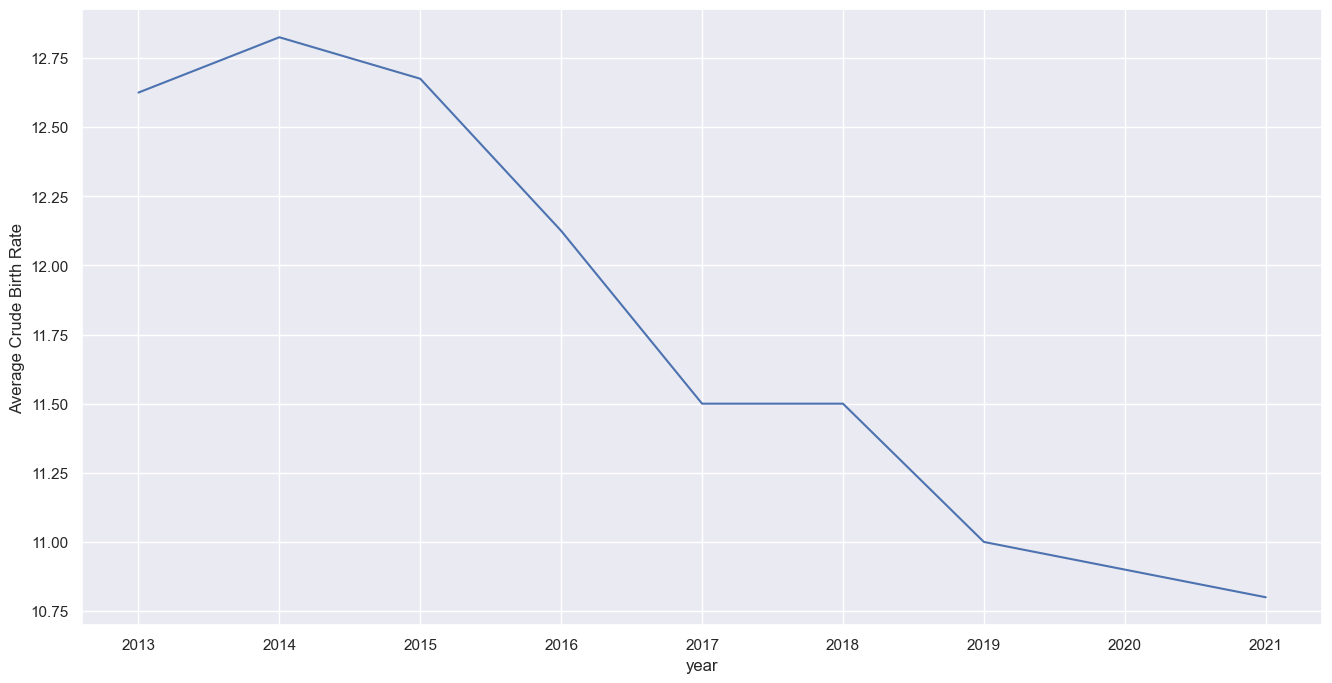

In [18]:
birth_Rate = pd.DataFrame(birth_Death_Rate_Data[['crude_birth_rate','year']])
birth_Rate_Above2012 = birth_Rate[birth_Rate['year'] >= 2013]

averge_BirthRate_perYear = {}
for x in birth_Rate_Above2012['year']:
    birth_Rate_mean = birth_Rate_Above2012.query('year == ' + str(x))['crude_birth_rate'].astype(float).mean()
    averge_BirthRate_perYear[x] = birth_Rate_mean

df_averge_BirthRate_perYear = pd.DataFrame(averge_BirthRate_perYear.items(), columns=['year', 'Average Crude Birth Rate'])

f = plt.figure(figsize=(16, 8))
sb.lineplot(data = df_averge_BirthRate_perYear, x = 'year', y = 'Average Crude Birth Rate')

### Fresh Graduate Income Salary Over the Years

{2013: 3254.883116883117, 2014: 3250.233009708738, 2015: 3358.0091743119265, 2016: 3431.119266055046, 2017: 3508.278260869565, 2018: 3567.198347107438, 2019: 3744.52, 2020: 3803.517985611511, 2021: 3934.6716417910447}


<AxesSubplot: xlabel='year', ylabel='Basic Mean Salary'>

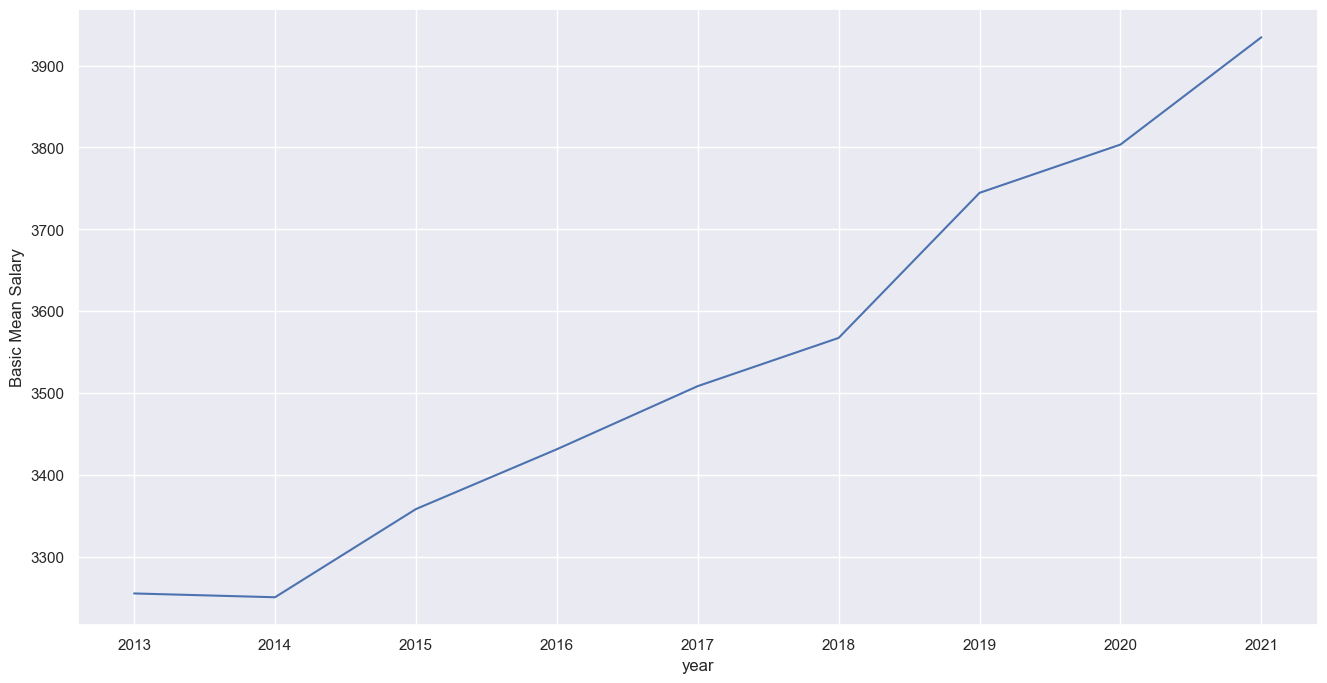

In [24]:
basic_salary_Rate = pd.DataFrame(graduate_Salary_Data[['year','basic_monthly_mean']])
basic_salary_Rate = basic_salary_Rate[basic_salary_Rate["basic_monthly_mean"].str.contains("na")==False]

averge_basic_SalaryperYear = {}
for x in basic_salary_Rate['year']:
    basic_salary_Rate_mean = basic_salary_Rate.query('year == ' + str(x))['basic_monthly_mean'].astype(int).mean()
    averge_basic_SalaryperYear[x] = basic_salary_Rate_mean

print(averge_basic_SalaryperYear)

df_averge_basic_SalaryperYear = pd.DataFrame(averge_basic_SalaryperYear.items(), columns=['year', 'Basic Mean Salary'])

f = plt.figure(figsize=(16, 8))
sb.lineplot(data = df_averge_basic_SalaryperYear, x = 'year', y = 'Basic Mean Salary')

### Displaying both Birth Rates and Income Salary from 2013 to 2021

(array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022.]),
 [Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

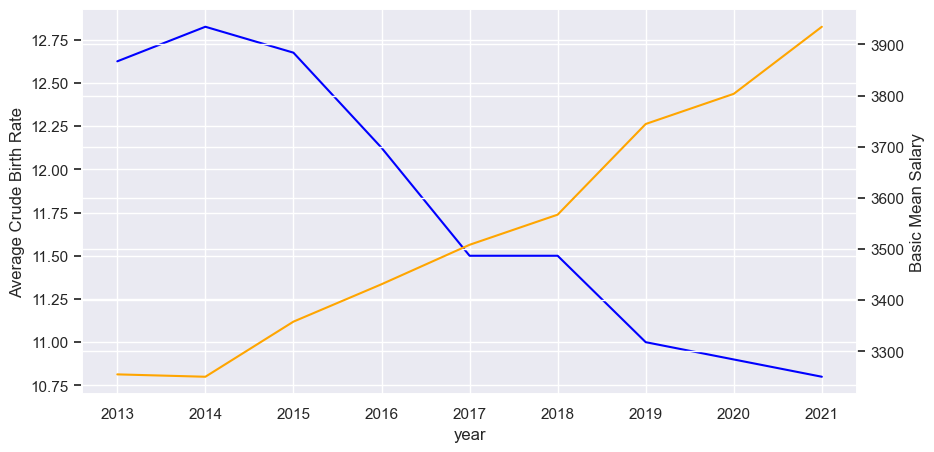

In [25]:
fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
jointDF = pd.merge(df_averge_BirthRate_perYear,df_averge_basic_SalaryperYear, on = 'year')

# changes here
sb.lineplot(x = 'year', y = 'Average Crude Birth Rate',data=jointDF,color='blue',ax=ax1)
sb.lineplot(x = 'year', y = 'Basic Mean Salary' ,data=jointDF,color='orange',ax=ax2)

# and here
plt.xticks(rotation=60)

### Correlation Betweem Graduate Income Salary Vs Birth Rate

<AxesSubplot: >

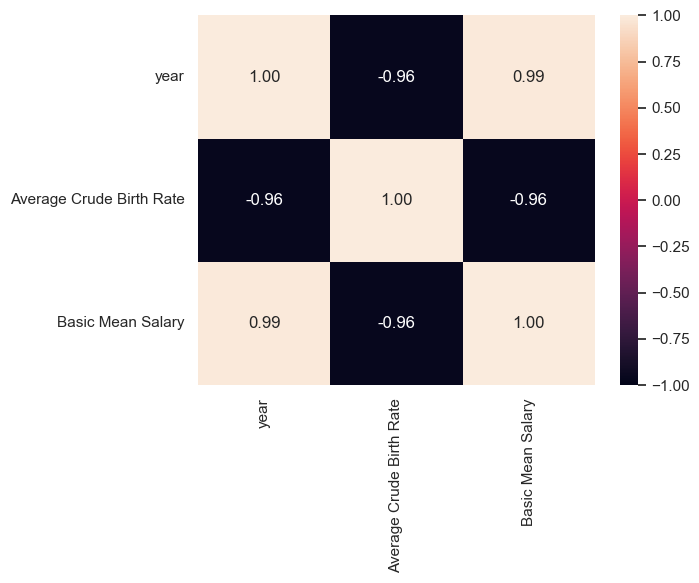

In [16]:
#pd.concat([df_averge_BirthRate_perYear, df_averge_SalaryperYear], axis = 1).reindex(df_averge_BirthRate_perYear.index)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [17]:
jointDF.corr()

,year,Average Crude Birth Rate,Basic Mean Salary
year,1.000000,-0.962903,0.986401
Average Crude Birth Rate,-0.962903,1.000000,-0.961479
Basic Mean Salary,0.986401,-0.961479,1.000000


### Increment in Gross Salary
This would mean that there is more overtime pay over the years.

{2013: 3348.2077922077924, 2014: 3368.902912621359, 2015: 3491.4036697247707, 2016: 3528.0733944954127, 2017: 3614.2608695652175, 2018: 3679.0661157024792, 2019: 3857.728, 2020: 3917.5827338129498, 2021: 4060.7611940298507}
{2013: 93.32467532467535, 2014: 118.66990291262118, 2015: 133.3944954128442, 2016: 96.95412844036673, 2017: 105.98260869565229, 2018: 111.86776859504107, 2019: 113.20800000000008, 2020: 114.06474820143876, 2021: 126.08955223880594}


(array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022.]),
 [Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

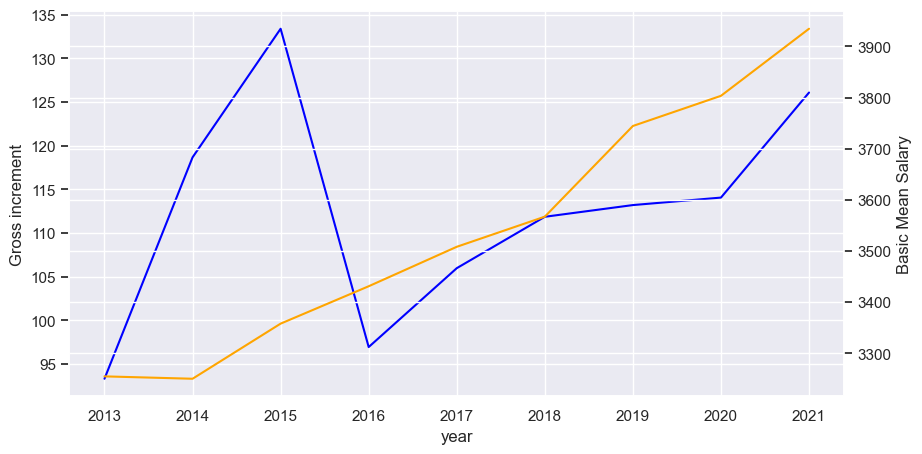

In [39]:
gross_salary_Rate = pd.DataFrame(graduate_Salary_Data[['year','gross_monthly_mean']])
gross_salary_Rate = gross_salary_Rate[gross_salary_Rate["gross_monthly_mean"].str.contains("na")==False]
gross_mean_SalaryperYear = {}
for x in gross_salary_Rate['year']:
    gross_salary_Rate_mean = gross_salary_Rate.query('year == ' + str(x))['gross_monthly_mean'].astype(int).mean()
    gross_mean_SalaryperYear[x] = gross_salary_Rate_mean
print(gross_mean_SalaryperYear)

gross_increment_salaryperYear = {}
for x in gross_mean_SalaryperYear:
    increment_gross = (gross_mean_SalaryperYear[x] - averge_basic_SalaryperYear[x])
    gross_increment_salaryperYear[x] = increment_gross
print(gross_increment_salaryperYear)


df_gross_increment_SalaryperYear = pd.DataFrame(gross_increment_salaryperYear.items(), columns=['year', 'Gross increment'])

'''f = plt.figure(figsize=(16, 8))
sb.lineplot(data = df_gross_increment_SalaryperYear, x = 'year', y = 'Gross increment')'''

fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
jointDF_grossIncrement_averageSalary = pd.merge(df_gross_increment_SalaryperYear,df_averge_basic_SalaryperYear, on = 'year')

# changes here
sb.lineplot(x = 'year', y = 'Gross increment',data=jointDF_grossIncrement_averageSalary,color='blue',ax=ax1)
sb.lineplot(x = 'year', y = 'Basic Mean Salary' ,data=jointDF_grossIncrement_averageSalary,color='orange',ax=ax2)

# and here
plt.xticks(rotation=60)

In [35]:
jointDF_grossIncrement_birthRate = pd.merge(df_averge_BirthRate_perYear,df_gross_increment_SalaryperYear, on = 'year')
jointDF_grossIncrement_birthRate.corr()

,year,Average Crude Birth Rate,Gross increment
year,1.000000,-0.962903,0.326838
Average Crude Birth Rate,-0.962903,1.000000,-0.116502
Gross increment,0.326838,-0.116502,1.000000


### Birth Rate by Ethnic Groups from 2013 to 2021

<AxesSubplot: xlabel='year'>

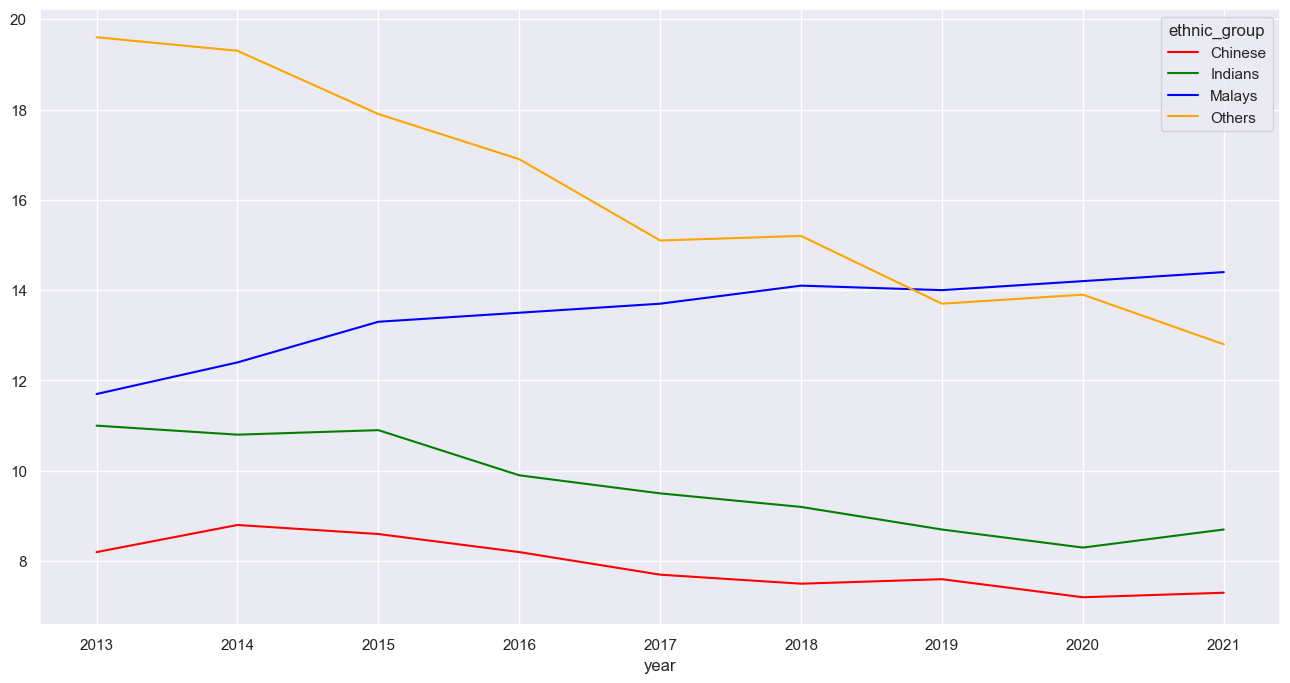

In [41]:
birth_rate_race = pd.DataFrame(birth_Death_Rate_Data[['year', 'ethnic_group', 'crude_birth_rate']])
birth_rate_race_Above2012 = birth_rate_race[birth_rate_race['year'] >= 2013]

#df_averge_SalaryperYear = pd.DataFrame(averge_SalaryperYear.items(), columns=['year', 'Basic Mean Salary'])

# pivot the data into the correct shape
birth_rate_race_Above2012 = birth_rate_race_Above2012.pivot(index='year', columns='ethnic_group', values='crude_birth_rate')
birth_rate_race_Above2012.plot(color=['red', 'green', 'blue', 'orange'], figsize=(16, 8))